In [0]:
#Assignment#

In [99]:
import pandas as pd

df = pd.read_csv("medals.csv")

#checking for duplicates and droping them. I use the subset of the list
#['Games', 'Athlete', 'Event', 'Team'] because in this case function as 
#unique indicators
#I make the assumption that in case duplicates I keep the most recent value
df = df.drop_duplicates(subset=['Games', 'Athlete', 'Event', 'Team'],\
                        keep='last')


In [101]:
#Functions

def remove_athletes(df, tb_removed):
    """Function to determine which athletes need their medals to be readjusted. By using the name of the athlete,
    two lists get generated containing the Games and Events were these athletes have a Gold medal
    df: source dataframe
    tb_removed: list containing the athletes that are disqualified"""
    events_list=[]
    games_list=[]
    for el in tb_removed:
        events_list.extend(df.loc[(df['Medal']== 'Gold') & (df['Athlete']==el), 'Event'].tolist())
        games_list.extend(df.loc[(df['Medal']== 'Gold') & (df['Athlete']==el), 'Games'].tolist())

    #Change the value for 'Medal" and 'Gold' 
    df.loc[(df['Medal']=='Gold') & (df['Athlete'].isin(tb_removed)), ['Medal','Gold']]='BANNED',0

    #Change the value for 'Silver' and 'Medal'
    df.loc[(df['Medal']== 'Silver') & (df['Event'].isin(events_list)) & (df['Games'].isin(games_list)),
           ['Silver', 'Gold', 'Medal']]=0,1,'Gold'

    #Change the value for 'Bronze' and 'Medal'
    df.loc[(df['Medal']== 'Bronze') & (df['Event'].isin(events_list)) & (df['Games'].isin(games_list)),
           ['Bronze','Silver','Medal']]=0,1,'Silver'
    return df
    
def golden_in_sports(df, plot):
    """Function that returns a dataframe of the top 5 athletes that have Gold Medal in the largest number of 
    different events
    df: source dataframe
    plot: variable for allowing/not allowing plotting"""
    
    df_ass2 = df[['Athlete', 'Event', 'Gold']].groupby('Athlete').agg({'Gold': 'sum', 'Event' : 'nunique'})\
            .sort_values(by=['Gold', 'Event'], ascending=False).head(5)
    if plot:
        ploting_chart(df_ass2)
    return df_ass2

def ploting_chart(df):
    """Function for plotting a graph
    df: source dataframe"""
    ax  = df.loc[:].plot.bar( rot=0,figsize=(9, 5),  title='Number of Events / Gold Medals')
    ax.set_xlabel("Athlete")
    ax.set_ylabel("Medal")


In [102]:

#First Question

#Find the respective category, group by Athlete and make the sum of the Gold.
df_ass1 = df.loc[df['Sport'] == 'Athletics'].groupby(['Athlete']).sum()\
          .sort_values(by=['Gold'], ascending=False).head(5)

print(df_ass1)

                Year  Gold  Silver  Bronze
Athlete                                   
Usain Bolt     18108     9       0       0
Paavo Nurmi    23084     9       3       0
Carl Lewis     19880     9       1       0
Allyson Felix  18104     6       3       0
Ville Ritola   15400     5       3       0


Text(0,0.5,'Medal')

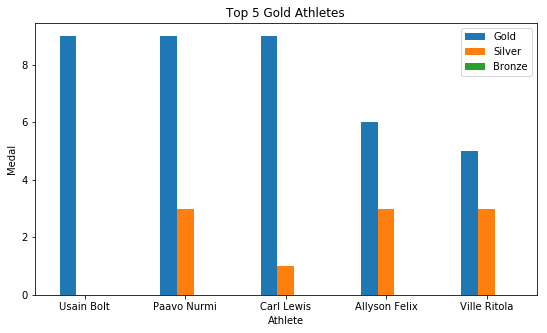

In [103]:
#Plot Question 1
ax  = df_ass1.loc[:, df_ass1.columns != 'Year'].plot.bar( rot=0,figsize=(9, 5),  title='Top 5 Gold Athletes')
ax.set_xlabel("Athlete")
ax.set_ylabel("Medal")


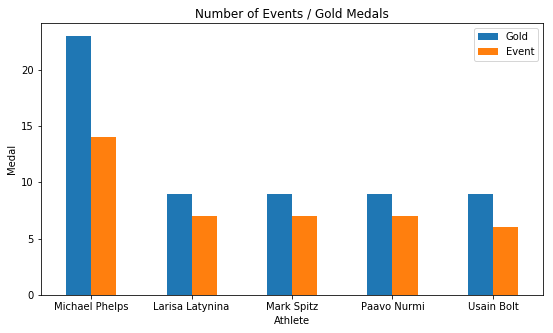

In [104]:
#Second Question
golden_in_sports(df, plot=True)
df_ass2 = golden_in_sports(df, plot=False) #dataframe that contains the top 5 athletes who \
                                            #have Gold in the largest number of different events


tb_removed = [] #List containing the 1st and 3rd athlete from the df_ass2 dataframe
tb_removed.append(df_ass2.index[0]) 
tb_removed.append(df_ass2.index[2]) 

,Gold,Event
Athlete,,
Larisa Latynina,9,7
Paavo Nurmi,9,7
Ryan Lochte,9,6
Usain Bolt,9,6
Carl Lewis,9,4


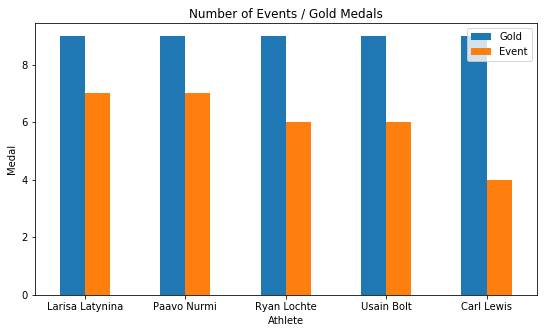

In [105]:

#Question 3
df=remove_athletes(df, tb_removed)#Dataframe containing the updated dataframe(with redistributed medals)
golden_in_sports(df, plot=True)
df.to_csv("medals_updated.csv")

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
0,Athens (1896),1896,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,BAN,0,0,0
1,Athens (1896),1896,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Gold,1,0,0
2,Athens (1896),1896,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0,0,1
3,Athens (1896),1896,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1,0,0
4,Athens (1896),1896,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0,1,0
5,Athens (1896),1896,Aquatics,Swimming,Efstathios Chorophas,GRE,Men,1200m freestyle men,Bronze,0,1,0
6,Athens (1896),1896,Aquatics,Swimming,alfred hajos,HUN,Men,1200m freestyle men,BAN,0,0,0
7,Athens (1896),1896,Aquatics,Swimming,joannis andreou,GRE,Men,1200m freestyle men,Gold,1,0,0
8,Athens (1896),1896,Aquatics,Swimming,Efstathios Chorophas,GRE,Men,400m freestyle men,Bronze,0,0,1
9,Athens (1896),1896,Aquatics,Swimming,paul neumann,AUT,Men,400m freestyle men,Gold,1,0,0
